# Heirarchical Clustering
During my doctoral thesis, I have most commonly used clustering algorithms to abstract meaning from my simulations, for example identifying the most stable structures of a protein in solution. Since these clustering algorithms are often pre-packaged in our simulation software, in this exercise, I want to explore Python's implementation. 

Some of the analysis is based on the the blog [here](https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097)

### Importing libraries

In [9]:
%matplotlib inline
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Creating a dataset for clustering

(-15, 15)

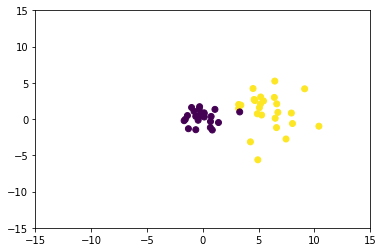

In [10]:
# Create blobs
data = make_blobs(n_samples=50, n_features=2, centers=[[0,0],[5,2]], cluster_std=[1,2], random_state=50)
# Create np array for data points
points = data[0]
# Visualize dataset in a scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

# Testing different linkage options
There are several options for linkage available here:
1. **single** - taking the distance of the nearest points between two clusters
2. **complete** - taking the distance of the furthest points between two clusters
3. **average** - taking the average distance between two clusters
4. **ward (default)** - uses the Ward variance minimization algorithm.  This method works out which observations to group based on reducing the sum of squared distances of each observation from the average observation in a cluster. This is often appropriate as this concept of distance matches the standard assumptions of how to compute differences between groups in statistics (e.g., ANOVA, MANOVA).

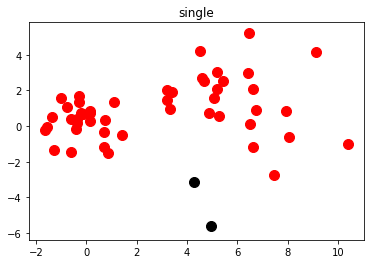

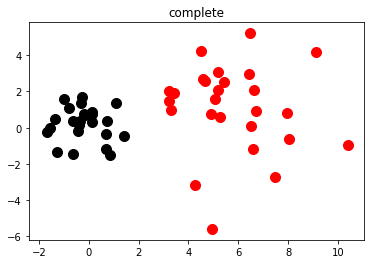

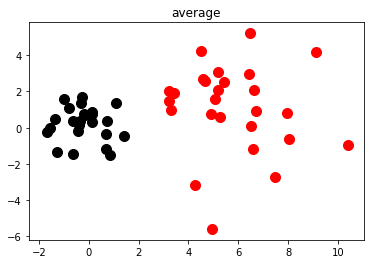

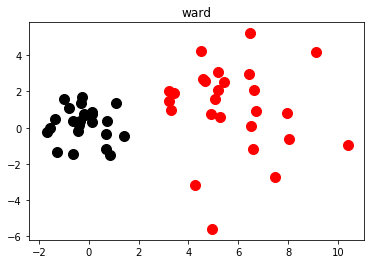

In [27]:
for linkage in ['single','complete', 'average','ward']:
    hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = linkage)
    # save clusters for chart
    y_hc = hc.fit_predict(points)
    plt.title(linkage)
    plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
    plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
    plt.show()

**Observation** - We see that 'single' performs the worst, while others ado fairly well. Since we created the data, we had a good assumption about the number of clusters to expect from this data. However, generally, we don't have that information, and need to look at the dendogram.

### Dendogram analysis


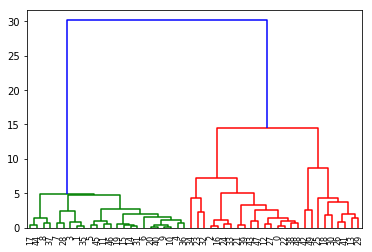

In [28]:
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

From the above dendogram, it would seem that clusters=3 would be a good choice.

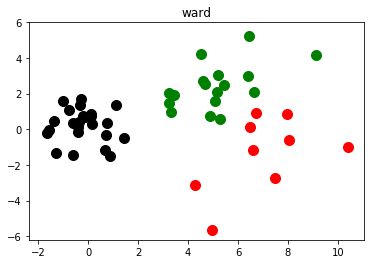

In [30]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = linkage)
    # save clusters for chart
y_hc = hc.fit_predict(points)
plt.title(linkage)
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc==2,0], points[y_hc == 2,1], s=100, c='green')
plt.show()

We can also checkout different distance algorithms

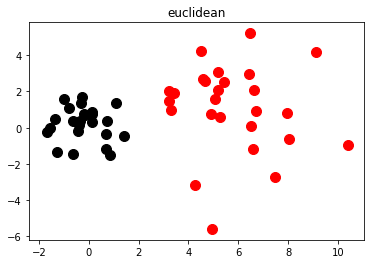

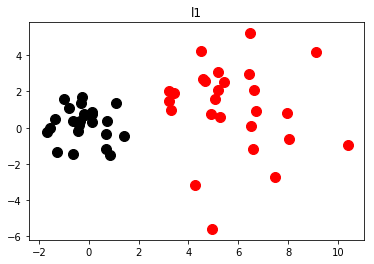

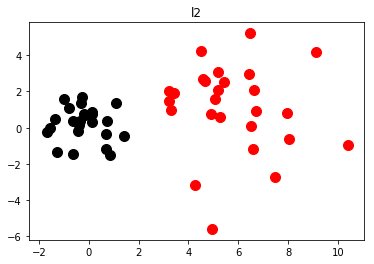

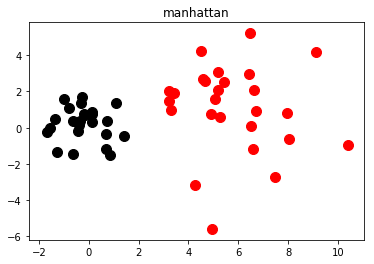

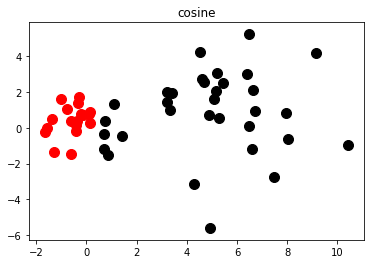

In [34]:
for dist in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
    hc = AgglomerativeClustering(n_clusters=2, affinity = dist, linkage = 'complete')
    # save clusters for chart
    y_hc = hc.fit_predict(points)
    plt.title(dist)
    plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
    plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
    plt.show()

**Observation** - We see that all the distance metrics, except cosine, perform similarly.

**Conclusion** - I tested Agglomerative Clustering on a test dataset and even with two centers with different variances, the method did a great job of distinguishing between clusters. Single linkage was the worst performer, andthe distance metric cosine is the worst.